In [1]:
import pandas as pd
import numpy as np

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Definição do problema:

- Considerando o dataset `Dataset- Superstore (2015-2018).csv` e a Análise Exploratória de Dados realizada no notebook `Time_Series.ipynb` bem como as previsões feitas segundos os diversos modelos anteriormente apresentados, pretende-se agora a definição de um problema associado a este dataset que possui características temporais bem como traços anteriormente analisados de sazonalidade e tendência que agora serão explorados quanto a:
    
    - Verificar o impacto das features em `Profit` para saber quais delas são mais relevantes para a previsão de `Profit` e `Sales` e, portanto, quais delas devem ser priorizadas em uma estratégia de marketing;

    - Segmentação de perfis de consumidores a fim de identificar padrões de consumo;
    
    - A necessidade de gerar modelos que possam prever o comportamento de `Profit` e `Sales` dada a grande correlação positiva entre elas de modo a aumentar as vendas em períodos de baixa venda/compra pois, conforme analisado anteriormente a respeito das features `Profit`, `Sales`, `Quantity` e `Discount`, há certa correlação entre elas e dada a verificação feita de que há correlação inclusive negativa quanto às relações entre `Discount x Sales` e `Discount x Profit`.

## Loading dataset

In [3]:
df = pd.read_csv('../data/Dataset- Superstore (2015-2018).csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Exploratory Data Analysis
Em razão de uma **definição de problema** que envolve a **segmentação de perfis de consumidores**, a fim de **identificar padrões de consumo**, é necessário que sejam analisadas as features que possuem relação com o comportamento de compra dos consumidores, ou seja, `Sales`, `Quantity` e `Discount` e, em razão da necessidade de se prever o comportamento de `Profit` e `Sales`, **justifica-se a necessidade de uma nova Análise Exploratória dos Dados**.

In [4]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [91]:
df.Country.nunique(), df.Country.unique()

(1, array(['United States'], dtype=object))

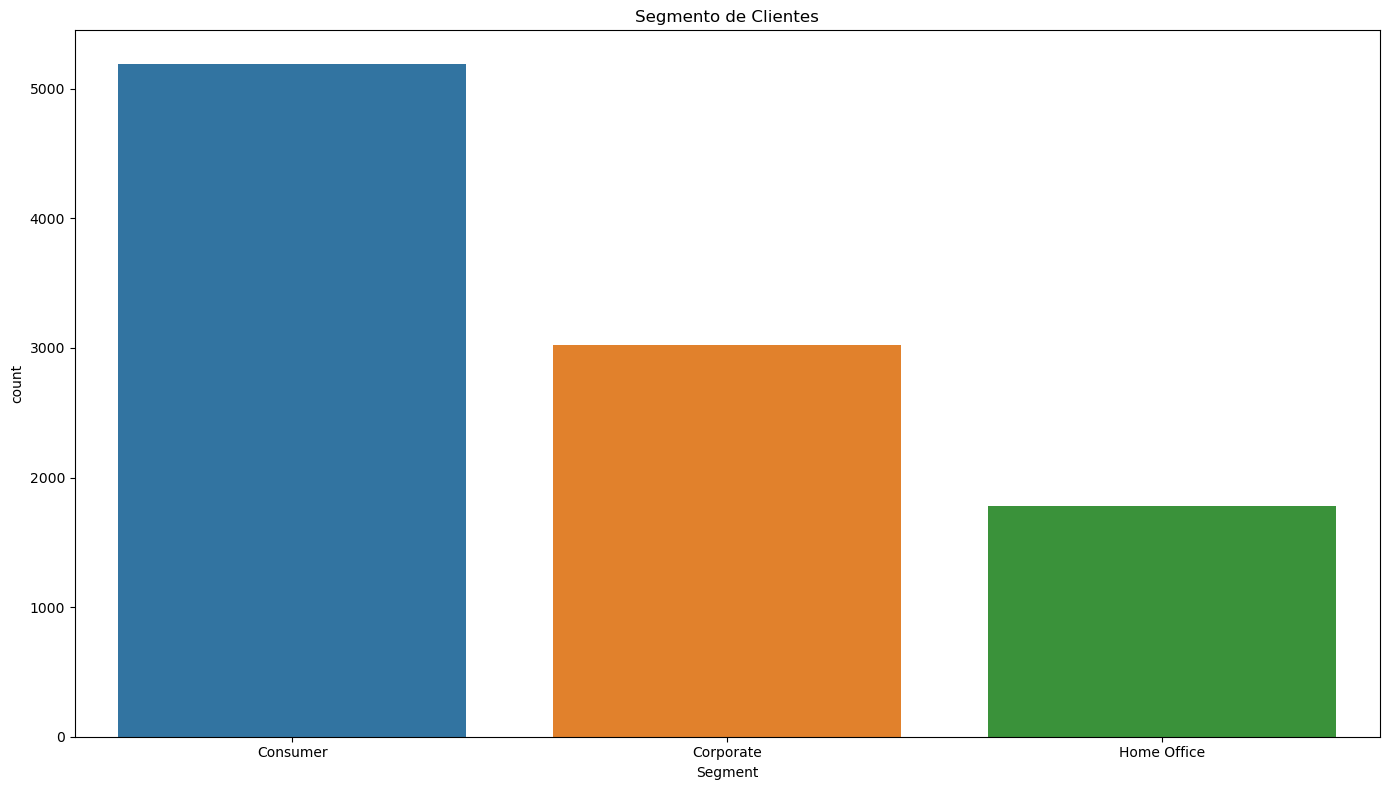

In [113]:
df.Segment.value_counts()
plt.figure(figsize=(14, 8))
sns.countplot(x='Segment', data=df)
plt.title('Segmento de Clientes')
plt.tight_layout()
plt.show()

In [95]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

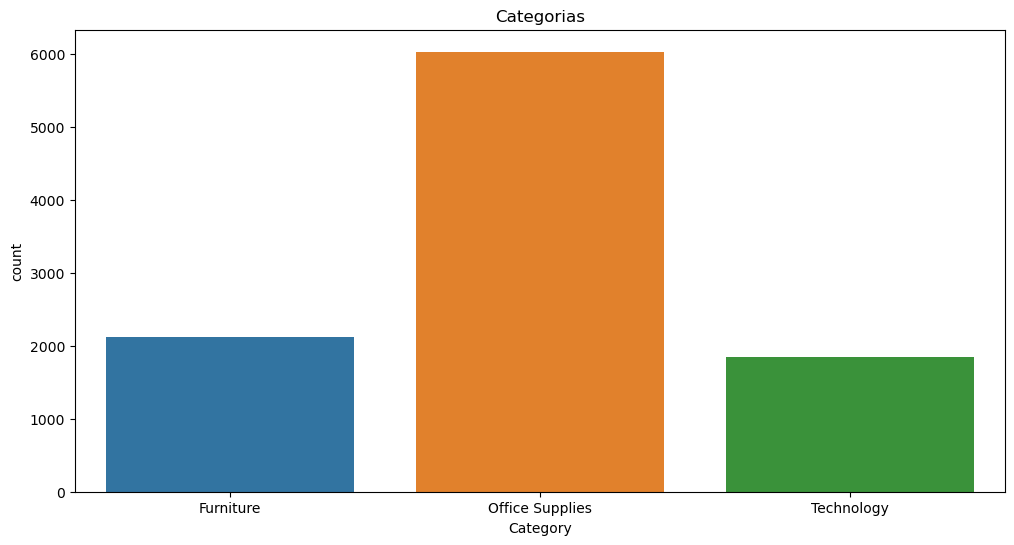

In [108]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df)
plt.title('Categorias')
plt.show()

In [98]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

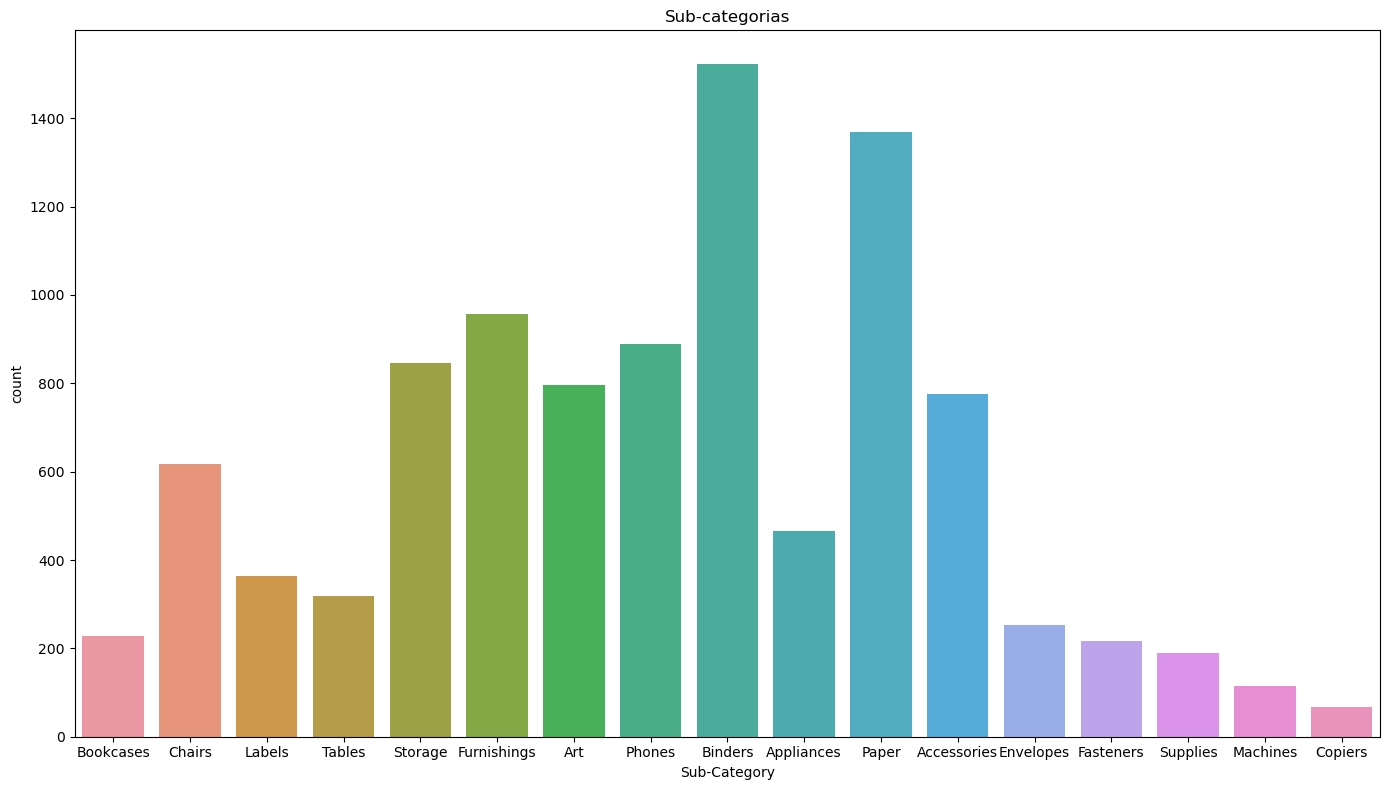

In [112]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Sub-Category', data=df)
plt.title('Sub-categorias')
plt.tight_layout()
plt.show()

- Os dados se referem a vendas realizadas num único país: `United States`. Faz sentido remover este em fase de preprocessamento.

- `Consumers` é o **segmento de cliente** com maior número de vendas, seguido por `Corporate` e por fim `Home Office`.

- Produtos de escritório (`Office Supplies`) são os **mais vendidos**, seguidos por mobília (`Furniture`) e por fim produtos de tecnologia (`Technology`).

- `Binders` e `Papers` são os produtos **mais vendidos**, seguidos por `Furnishings` e `Phones`.

Irrelevant features

In [34]:
irrelevant_features = ['Row ID']
#irrelevant_features = ['Row ID', 'Order ID', 'Customer ID', 'Customer_Name', 'Postal Code']
print(f'Irrelevant features:\n', *irrelevant_features, sep='\n- ',
    end=f'\n\nNumber of irrelevant features: {len(irrelevant_features)}')

Irrelevant features:

- Row ID

Number of irrelevant features: 1

Date Features 

In [36]:
date_features = ['Order Date', 'Ship Date']
print(f'Date features:\n', *date_features, sep='\n- ',
    end=f'\n\nNumber of date features: {len(date_features)}')

Date features:

- Order Date
- Ship Date

Number of date features: 2

Numeric features

In [37]:
numerical_features = list(df._get_numeric_data().columns)
numerical_features = [feature for feature in numerical_features if feature not in irrelevant_features]

print(f'Numerical features:\n', *numerical_features, sep='\n- ',
    end=f'\n\nNumber of numerical features: {len(numerical_features)}')

Numerical features:

- Postal Code
- Sales
- Quantity
- Discount
- Profit

Number of numerical features: 5

Categorical features

In [38]:
categorical_features = list(set(df.columns) - set(numerical_features) - set(date_features) - set(irrelevant_features))

print(f'Categorical features:\n', *categorical_features, sep='\n- ',
    end=f'\n\nNumber of categorical features: {len(categorical_features)}')

Categorical features:

- Ship Mode
- Region
- Order ID
- Product Name
- Category
- State
- Segment
- Customer Name
- Customer ID
- Sub-Category
- City
- Country
- Product ID

Number of categorical features: 13

## Preprocessor pipeline

In [84]:
from sklearn.pipeline import FunctionTransformer, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

def preprocess_features(df: pd.DataFrame, target_feature: pd.DataFrame, numeric_features: list, categorical_features: list, date_features: list, irrelevant_features: list) -> pd.DataFrame:
    """
    Preprocesses the dataset by:
    - Dropping irrelevant features
    - Imputing missing values
    - Converting date features to datetime 
    - Encoding categorical features
    - Scaling numerical features
    - Creating new features
    - Splitting the dataset into train and test sets
    """
    
    # Drop irrelevant features
    df = df.drop(columns=irrelevant_features, axis=1)
    
    # Impute missing values
    numeric_transformer = make_pipeline(
        SimpleImputer(strategy="median"), StandardScaler()
    )
    
    # Missing_values categoricos -> valor constante
    # OneHotEncoder -> variáveis categóricas
    categorical_transformer = make_pipeline(
        SimpleImputer(strategy="constant", fill_value="missing"),
        OneHotEncoder(handle_unknown="ignore", sparse=False),
    )
    
    # Convert date features to datetime
    # Create a FunctionTransformer for datetime conversion
    datetime_converter = FunctionTransformer(lambda X: X[date_features].apply(pd.to_datetime))   
    
    # cria um preprocessador para aplicar as transformações definidas acima
    preprocessor = make_column_transformer(
        (numeric_transformer, numeric_features),
        (categorical_transformer, categorical_features),
        (datetime_converter, date_features),
        ("drop", irrelevant_features),
    )
        
    # Define the features
    features = df.drop(columns=target_feature, axis=1)
    
    #print(f'Features:\n', *features, sep='\n- ', end=f'\n\nNumber of features: {len(features.columns)}')
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, df[target_feature], test_size=0.2, random_state=42)
    
    preprocessor.fit(X_train)
    
    
    return X_train, X_test, y_train, y_test

In [85]:
help(preprocess_features)

Help on function preprocess_features in module __main__:

preprocess_features(df: pandas.core.frame.DataFrame, target_feature: pandas.core.frame.DataFrame, numeric_features: list, categorical_features: list, date_features: list, irrelevant_features: list) -> pandas.core.frame.DataFrame
    Preprocesses the dataset by:
    - Dropping irrelevant features
    - Imputing missing values
    - Converting date features to datetime 
    - Encoding categorical features
    - Scaling numerical features
    - Creating new features
    - Splitting the dataset into train and test sets



Definindo o target para `Sales`

In [86]:
target_feature = ['Sales']

Aplicando o pipeline de preprocessamento

In [87]:
X_train, X_test, y_train, y_test = preprocess_features(df, target_feature, numerical_features, categorical_features, date_features, irrelevant_features)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7995 entries, 4100 to 7270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       7995 non-null   object 
 1   Order Date     7995 non-null   object 
 2   Ship Date      7995 non-null   object 
 3   Ship Mode      7995 non-null   object 
 4   Customer ID    7995 non-null   object 
 5   Customer Name  7995 non-null   object 
 6   Segment        7995 non-null   object 
 7   Country        7995 non-null   object 
 8   City           7995 non-null   object 
 9   State          7995 non-null   object 
 10  Postal Code    7995 non-null   int64  
 11  Region         7995 non-null   object 
 12  Product ID     7995 non-null   object 
 13  Category       7995 non-null   object 
 14  Sub-Category   7995 non-null   object 
 15  Product Name   7995 non-null   object 
 16  Quantity       7995 non-null   int64  
 17  Discount       7995 non-null   float64
 18  Profi